In [2]:
import pandas as pd
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

from task_geo.data_sources.covid import cds
from task_geo.data_sources import get_data_source
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
all_data = get_data_source('cds')()
all_data.groupby('sub_region')['cases'].count().sort_values(ascending=False)


/home/wwymak/anaconda3/envs/immo-ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


sub_region
Washington County    1377
Jefferson County      999
Franklin County       934
Jackson County        822
Lincoln County        788
                     ... 
Brewster County         1
Norton County           1
Arthur County           1
Kanabec County          1
Sac County              1
Name: cases, Length: 2032, dtype: int64

In [18]:
all_data[( all_data.country=='United Kingdom')]

,country,region,sub_region,city,lat,long,date,url,aggregate,tz,cases,deaths,recovered,active,tested,growth_factor
622,United Kingdom,NaN,NaN,NaN,55.4020,-3.208,2020-01-31,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,2,0,0,2,0,NaN
712,United Kingdom,NaN,NaN,NaN,55.4020,-3.208,2020-02-01,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,2,0,0,2,0,NaN
789,United Kingdom,NaN,NaN,NaN,55.4020,-3.208,2020-02-02,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,2,0,0,2,0,NaN
929,United Kingdom,NaN,NaN,NaN,55.4020,-3.208,2020-02-03,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,2,0,0,2,0,NaN
995,United Kingdom,NaN,NaN,NaN,55.4020,-3.208,2020-02-04,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,2,0,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164551,United Kingdom,England,Medway,NaN,51.4175,0.563,2020-05-01,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,620,0,0,0,0,NaN
164552,United Kingdom,England,Trafford,NaN,53.4185,-2.364,2020-05-01,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,592,0,0,0,0,NaN
164554,United Kingdom,England,Oldham,NaN,53.5575,-2.048,2020-05-01,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,622,0,0,0,0,NaN
164555,United Kingdom,England,Sunderland,NaN,54.8715,-1.453,2020-05-01,https://publicdashacc.blob.core.windows.net/pu...,county,Europe/London,1164,0,0,0,0,NaN


In [32]:
washington = all_data[( all_data.region=='Washington') & (all_data["aggregate"] =='state')].reset_index(drop=True)
washington['date'] = washington.date.dt.normalize()
washington['day_of_week'] = washington.date.dt.dayofweek
washington.head()

,country,region,sub_region,city,lat,long,date,url,aggregate,tz,cases,deaths,recovered,active,tested,growth_factor,day_of_week
0,United States,Washington,NaN,NaN,47.273,-120.8245,2020-01-22,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,0,0,0,0,NaN,2
1,United States,Washington,NaN,NaN,47.273,-120.8245,2020-01-23,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,0,0,0,0,NaN,3
2,United States,Washington,NaN,NaN,47.273,-120.8245,2020-01-24,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,0,0,0,0,NaN,4
3,United States,Washington,NaN,NaN,47.273,-120.8245,2020-01-25,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,0,0,0,0,NaN,5
4,United States,Washington,NaN,NaN,47.273,-120.8245,2020-01-26,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,0,0,0,0,NaN,6


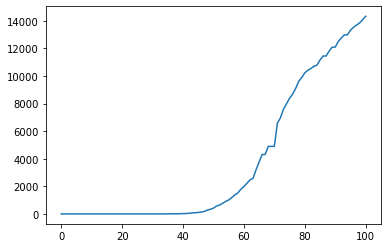

In [34]:
washington.deaths.plot()

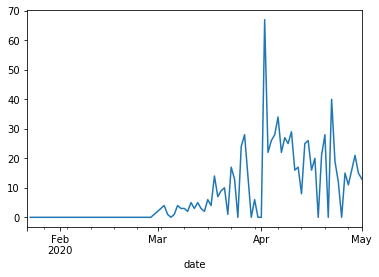

In [36]:
# if you want to look at the cumsum
# although, actually less sure about these...
washington['new_cases'] = washington.cases.diff()
washington['new_deaths'] = washington.deaths.diff()
washington['new_recoverd'] = washington.recovered.diff()
washington['new_tested'] = washington.tested.diff()

washington.set_index('date')['new_deaths'].plot()

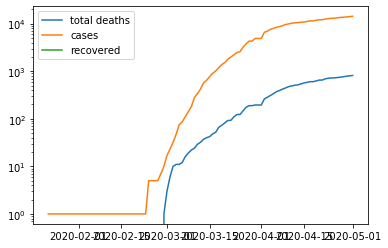

In [38]:
plt.plot(washington.date, washington['deaths'], label='total deaths');
plt.plot(washington.date, washington['cases'], label='cases');
plt.plot(washington.date, washington['recovered'], label='recovered');
plt.yscale('log');
plt.legend();

In [48]:
# mobility = get_data_source('mobility')()
mobility = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', parse_dates=['date'])
mobility.head()

/home/wwymak/anaconda3/envs/immo-ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [49]:
 # google's mobility data is further subdivided down to the county level. For the state level, fitler for sub_region_2 is nan
mobility[(mobility.country_region_code=='US') & (mobility.sub_region_1=='Washington')].sub_region_2.unique()

array([nan, 'Adams County', 'Asotin County', 'Benton County',
       'Chelan County', 'Clallam County', 'Clark County',
       'Cowlitz County', 'Douglas County', 'Ferry County',
       'Franklin County', 'Grant County', 'Grays Harbor County',
       'Island County', 'Jefferson County', 'King County',
       'Kitsap County', 'Kittitas County', 'Klickitat County',
       'Lewis County', 'Lincoln County', 'Mason County',
       'Okanogan County', 'Pacific County', 'Pend Oreille County',
       'Pierce County', 'San Juan County', 'Skagit County',
       'Skamania County', 'Snohomish County', 'Spokane County',
       'Stevens County', 'Thurston County', 'Walla Walla County',
       'Whatcom County', 'Whitman County', 'Yakima County'], dtype=object)

In [57]:
washington_mobility = mobility[(mobility.country_region_code=='US') & (mobility.sub_region_1=='Washington') & mobility.sub_region_2.isna()].copy()
washington_mobility = washington_mobility.rename(columns={ k: f"mobility_{k}" for k in 
   [ "retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline", 
    "transit_stations_percent_change_from_baseline",	"workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]
})
washington_mobility.shape, washington_mobility.date.unique().shape

((72, 11), (72,))

In [58]:
washington_mobility

,country_region_code,country_region,sub_region_1,sub_region_2,date,mobility_retail_and_recreation_percent_change_from_baseline,mobility_grocery_and_pharmacy_percent_change_from_baseline,mobility_parks_percent_change_from_baseline,mobility_transit_stations_percent_change_from_baseline,mobility_workplaces_percent_change_from_baseline,mobility_residential_percent_change_from_baseline
269706,US,United States,Washington,NaN,2020-02-15,2.0,-1.0,8.0,8.0,-3.0,0.0
269707,US,United States,Washington,NaN,2020-02-16,15.0,3.0,19.0,5.0,-1.0,-1.0
269708,US,United States,Washington,NaN,2020-02-17,12.0,2.0,63.0,-7.0,-35.0,6.0
269709,US,United States,Washington,NaN,2020-02-18,5.0,2.0,52.0,7.0,-4.0,0.0
269710,US,United States,Washington,NaN,2020-02-19,4.0,3.0,60.0,7.0,-2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
269773,US,United States,Washington,NaN,2020-04-22,-40.0,-14.0,-23.0,-57.0,-55.0,22.0
269774,US,United States,Washington,NaN,2020-04-23,-39.0,-12.0,2.0,-56.0,-54.0,21.0
269775,US,United States,Washington,NaN,2020-04-24,-40.0,-14.0,17.0,-54.0,-53.0,21.0
269776,US,United States,Washington,NaN,2020-04-25,-45.0,-15.0,8.0,-46.0,-37.0,13.0


In [61]:
washington_merged = washington.set_index('date').merge(washington_mobility.set_index('date'), left_index=True, right_index=True, how='inner')

In [62]:
washington_merged

,country,region,sub_region,city,lat,long,url,aggregate,tz,cases,...,country_region_code,country_region,sub_region_1,sub_region_2,mobility_retail_and_recreation_percent_change_from_baseline,mobility_grocery_and_pharmacy_percent_change_from_baseline,mobility_parks_percent_change_from_baseline,mobility_transit_stations_percent_change_from_baseline,mobility_workplaces_percent_change_from_baseline,mobility_residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,...,US,United States,Washington,NaN,2.0,-1.0,8.0,8.0,-3.0,0.0
2020-02-16,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,...,US,United States,Washington,NaN,15.0,3.0,19.0,5.0,-1.0,-1.0
2020-02-17,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,...,US,United States,Washington,NaN,12.0,2.0,63.0,-7.0,-35.0,6.0
2020-02-18,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,...,US,United States,Washington,NaN,5.0,2.0,52.0,7.0,-4.0,0.0
2020-02-19,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,1,...,US,United States,Washington,NaN,4.0,3.0,60.0,7.0,-2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-22,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,12494,...,US,United States,Washington,NaN,-40.0,-14.0,-23.0,-57.0,-55.0,22.0
2020-04-23,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,12753,...,US,United States,Washington,NaN,-39.0,-12.0,2.0,-56.0,-54.0,21.0
2020-04-24,United States,Washington,NaN,NaN,47.273,-120.8245,https://covidtracking.com/api/v1/states/curren...,state,America/Los_Angeles,12977,...,US,United States,Washington,NaN,-40.0,-14.0,17.0,-54.0,-53.0,21.0


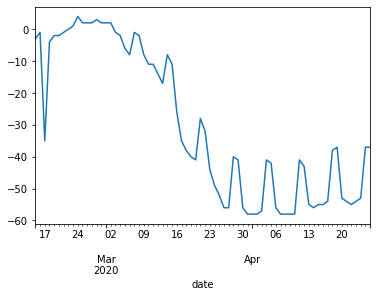

In [65]:
washington_merged.mobility_workplaces_percent_change_from_baseline.plot()